In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [4]:
data = pd.read_excel('BigCitiesHealth.xlsx')

In [5]:
data.tail()

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148291,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN


In [6]:
data.groupby('geo_label_state')['metric_item_label'].value_counts()


geo_label_state  metric_item_label            
AZ               Premature Death                  330
                 Heart Disease Deaths             305
                 Injury Deaths                    305
                 Cardiovascular Disease Deaths    298
                 All Cancer Deaths                292
                                                 ... 
Washington       Uninsured                         82
                 Flu Vaccinations                  47
                 Racial Segregation                44
                 Homelessness                      12
                 Syphilis                          11
Name: count, Length: 2258, dtype: int64

### Looking for Missing Values and Outliers
The numerical columns in our data are: 'value_95_ci_low' and 'value_95_ci_high'

Text(0.5, 1.0, 'Percentage of Missing Values in "value_95_ci_high"')

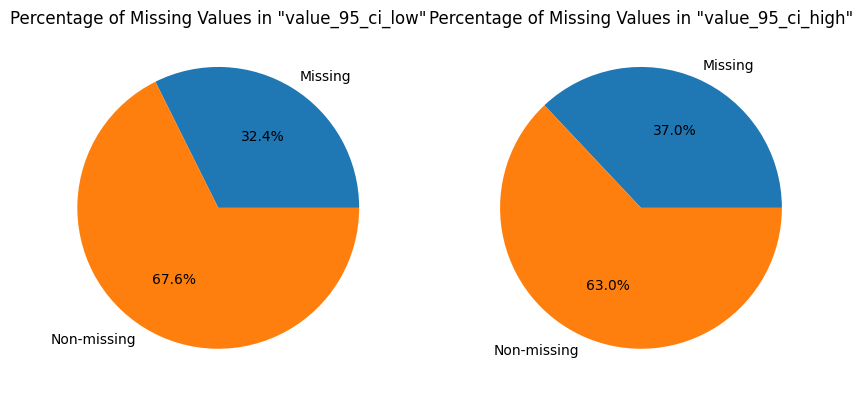

In [7]:
#Find NaNs in 'value_95_ci_low'
nan_low = data['value_95_ci_low'].isna().value_counts()

#Find NaNs in 'value_95_ci_low'
nan_high = data['value_95_ci_high'].isna().value_counts()

nan_low, nan_high

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for 'value_95_ci_low'
labels = ['Missing', 'Non-missing']
sizes = [nan_low[True], nan_low[False]]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Percentage of Missing Values in "value_95_ci_low"')

# Plot the pie chart for 'value_95_ci_high'
labels = ['Missing', 'Non-missing']
sizes = [nan_high[True], nan_high[False]]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Percentage of Missing Values in "value_95_ci_high"')



In [8]:
#'value_95_ci_low' to numerical
#data['value_95_ci_low'] = pd.to_numeric(data['value_95_ci_low'])

In [9]:
num_col = data[['value_95_ci_low','value_95_ci_high']]
num_col.dtypes

value_95_ci_low      object
value_95_ci_high    float64
dtype: object